In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20109\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20109\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Select the 5000 from 0 and 5000 from 1 rows using label colums
df = pd.read_csv('WELFake_Dataset.csv')
df0 = df[df['label'] == 0].sample(5000)
df1 = df[df['label'] == 1].sample(5000)
df = pd.concat([df0, df1])

In [33]:
df.head()

,Unnamed: 0,title,text,label
42761,42761,Syria says military jet downed in northern Ham...,AMMAN (Reuters) - Syria s armed forces said in...,0
51402,51402,Blasphemy and the law of fanatics,"As they went on their rampage, the men who kil...",0
26268,26268,Obama orders review of 2016 election cyber att...,WASHINGTON (Reuters) - U.S. President Barack O...,0
52239,52239,U.S. defense chief urges Congress to stick to ...,SEATTLE (Reuters) - U.S. Defense Secretary Ash...,0
30790,30790,Vatican Invites ‘Population Bomb’ Hoaxer Paul ...,The Vatican has invited the most notorious pop...,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 42761 to 30915
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   title       9931 non-null   object
 2   text        9991 non-null   object
 3   label       10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


In [35]:
# Missing data analysis
df.isnull().sum()

Unnamed: 0     0
title         69
text           9
label          0
dtype: int64

In [36]:
# Drop NA values
df = df.dropna()

df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [37]:
df.shape

(9922, 4)

In [38]:
# Drop unused columns
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,title,text,label
42761,Syria says military jet downed in northern Ham...,AMMAN (Reuters) - Syria s armed forces said in...,0
51402,Blasphemy and the law of fanatics,"As they went on their rampage, the men who kil...",0
26268,Obama orders review of 2016 election cyber att...,WASHINGTON (Reuters) - U.S. President Barack O...,0
52239,U.S. defense chief urges Congress to stick to ...,SEATTLE (Reuters) - U.S. Defense Secretary Ash...,0
30790,Vatican Invites ‘Population Bomb’ Hoaxer Paul ...,The Vatican has invited the most notorious pop...,0


<Axes: ylabel='count'>

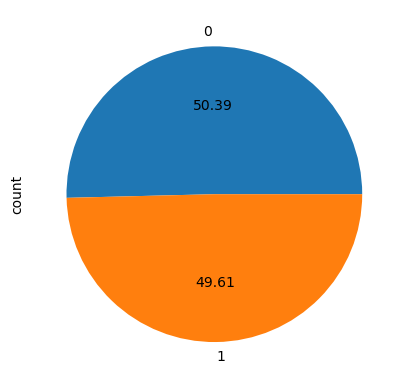

In [39]:
# Class distribution
# 0 - Fake, 1 - Real
df['label'].value_counts().plot.pie(autopct='%.2f')

In [40]:
# Define X and Y
X = df.drop(columns=['label'])
y = df['label']

In [41]:
messages = X.copy()

messages.reset_index(inplace=True)


In [42]:
# Initialize the lemmatizer and stemmer
lm = WordNetLemmatizer().
ps = PorterStemmer()

# Initialize an empty list to store the cleaned messages
corpus = []


for i in range(len(messages)):
    review = re.sub('[^a-zA-Z0-9]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(x) for x in review if x not in stopwords.words('english')]
    review = " ".join(review)
    corpus.append(review)

In [43]:
# Initialize the lemmatizer and stemmer
lm = WordNetLemmatizer()
ps = PorterStemmer()

# Initialize an empty list to store the cleaned messages
corpus = []


for i in range(len(messages)):
    review = re.sub('[^a-zA-Z0-9]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(x) for x in review if x not in stopwords.words('english')]
    review = " ".join(review)
    corpus.append(review)

In [45]:
corpus[0:10]

['amman reuter syria arm forc said insurg down militari jet northern hama provinc tuesday kill pilot milit group tahrir al sham fight forc domin member al qaeda former branch syria said hit plane sourc said milit search anoth pilot believ surviv crash syria air forc armi support russian air power iranian back militia step offens hama recent week push north toward rebel stronghold idlib aid worker wit say dozen civilian kill town villag away front line',
 'went rampag men kill 12 peopl pari week yell aveng prophet follow path terrorist bomb newspap offic stab filmmak kill writer translat mete believ proper koran punish blasphemi fact koran prescrib punish blasphemi like mani fanat violent aspect islam terror today idea islam requir insult prophet muhammad met violenc creation politician cleric serv polit agenda one holi book deepli concern blasphemi bibl old testament blasphemi blasphem condemn prescrib harsh punish best known passag leviticu 24 16 anyon blasphem name lord put death ent

In [46]:
print(sum(len(sentence.split()) for sentence in corpus))

3108151


In [47]:
max_length = max(len(sentence.split()) for sentence in corpus)

print("Maximum sentence length:", max_length)

Maximum sentence length: 8146


In [48]:
len(corpus)

9922

In [49]:
# TF-IDF Vectorizer

tf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
x=tf.fit_transform(corpus).toarray()

In [50]:
y = df["label"]
y.head()

42761    0
51402    0
26268    0
52239    0
30790    0
Name: label, dtype: int64

In [25]:
x[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Splitting into train and test sets

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred=rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9242    0.9140    0.9191      1000
           1     0.9137    0.9239    0.9187       985

    accuracy                         0.9189      1985
   macro avg     0.9189    0.9189    0.9189      1985
weighted avg     0.9189    0.9189    0.9189      1985



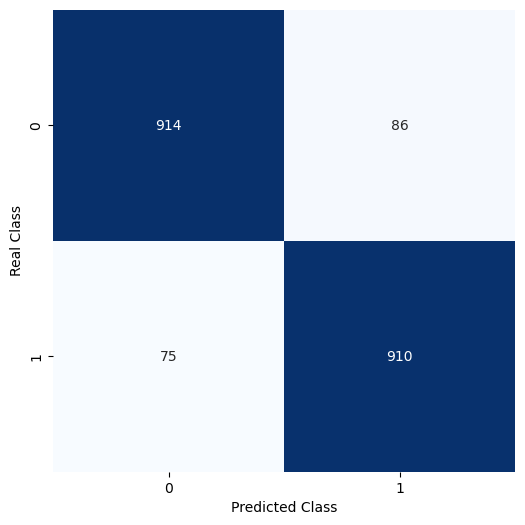

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()